Best parameters for MLP: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best accuracy for MLP: 0.6805418719211822
MLP Classifier Accuracy: 0.625
              precision    recall  f1-score   support

           1       0.60      0.43      0.50         7
           2       0.64      0.78      0.70         9

    accuracy                           0.62        16
   macro avg       0.62      0.60      0.60        16
weighted avg       0.62      0.62      0.61        16

[[3 4]
 [2 7]]


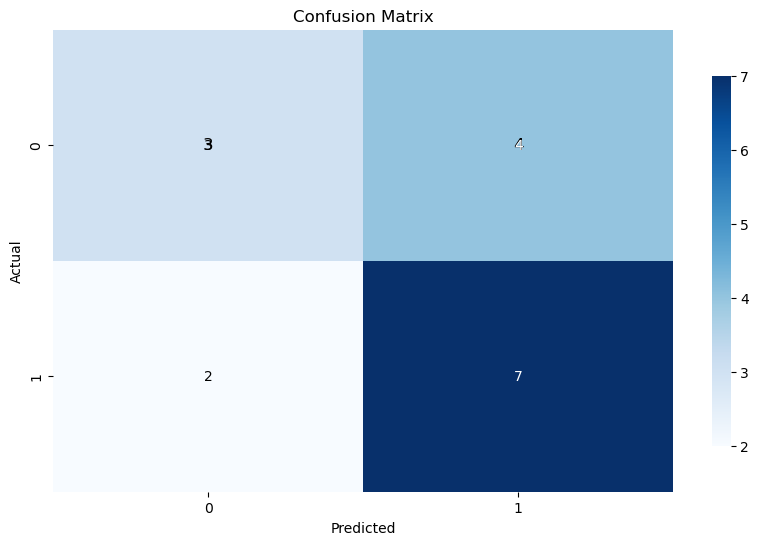

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
try:
    df = pd.read_excel('Featured_Data.xlsx')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Splitting the data
X = df.iloc[:, 1:7].values
y = df.iloc[:, 7].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=7, stratify=y)

param_grid = {
    'hidden_layer_sizes': [(50,50), (100,), (100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive']
}

#grid_search = GridSearchCV(MLPClassifier(random_state=42, max_iter=300), param_grid, cv=5, scoring='accuracy')
grid_search = GridSearchCV(MLPClassifier(random_state=42, max_iter=10000), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

print(f"Best parameters for MLP: {grid_search.best_params_}")
print(f"Best accuracy for MLP: {grid_search.best_score_}")

best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

print(f"MLP Classifier Accuracy: {accuracy_score(Y_test, y_pred)}")
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

# Confusion Matrix Plot
plt.figure(figsize=(10, 6))
plt.title('Confusion Matrix')
cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12, "color": "black"},
            cbar_kws={"shrink": 0.8})

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
        plt.text(j + 0.5, i + 0.5, cm[i, j], horizontalalignment='center', 
                 verticalalignment='center', color=color)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
